In [1]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery, DLRawTriggerReader, DLImageReader
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.core.traits import List

from ctapipe.core import QualityQuery
import astropy.units as u
from pathlib import Path

source = EventSource("/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run3.r0.h5")
geom = source.subarray.tel[1].camera.geometry

# Waveform with hexagonal data

In [11]:
reader = DLRawTriggerReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "HexagonalPatchMapper", #"ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "waveform",
                              cpe_threshold = 300,#"flowers_per_patch" : 37,"cpe_threshold" : 0, "trigger_patch_type" : "hexagonal"
                              sequence_length = 30,
                              add_dummy_channel = False,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1,2,3,4],
                              quality_cuts = False)

In [3]:
reader.example_identifiers


<Table length=44417>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ... -1.9925999642324606                         1
    1          0           0 ... -1.9925999642324606                         1
    2          0           0 ... -1.9925999642324606                         1
    3          0           1 ...  -1.657152616972841                         1
    4          0           2 ... -1.3726791842140216                         1
    5          0           1 ... -1.4897898175306203                         1
    6          0           1 ... -1.4897898175306203                         1
    7          0           0 ... -1.4897898175306203                         1
    8          0           3 ... -1.4897898175306203                         1
  ...        ...         ... ...                 ...                       ...
44408          0       11205 ... -0.8095704438545193                         1
44409          0       11042 ... -0.8095704438545193                         1
44410          0       11103 ... -0.8095704438545193                         1
44411          0       11206 ... -0.8095704438545193                         1
44412          0       11058 ... -0.8095704438545193                         1
44413          0       11043 ... -0.8692292010335622                         1
44414          0       11104 ... -0.8692292010335622                         1
44415          0       11207 ... -0.8692292010335622                         1
44416          0       11059 ... -0.8692292010335622                         1

In [12]:
waveform = reader.generate_mono_batch(batch_indices=[20,21,22,23,24,25,26,27,28])
waveform

<Table length=9>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
   20          0           4 ...  -1.800087774779224                         1
   21          0           6 ...  -1.800087774779224                         1
   22          0           5 ...  -1.800087774779224                         1
   23          0           5 ...  -1.800087774779224                         1
   24          0           5 ... -0.8830110313976508                         1
   25          0           7 ... -0.8830110313976508                         1
   26          0           6 ... -0.8830110313976508                         1
   27          0           6 ... -0.8830110313976508                         1
   28          0           6 ... -0.8830110313976508                         1

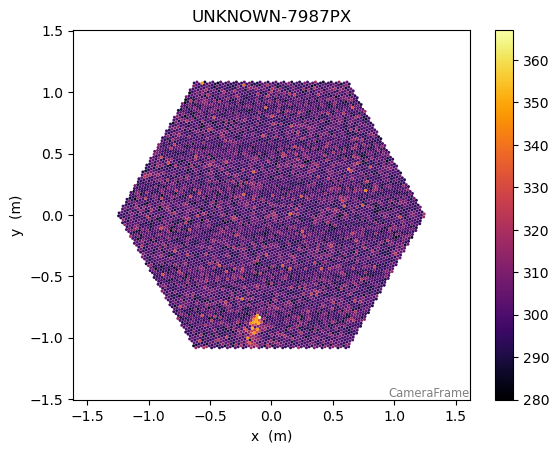

In [16]:
display7987 = CameraDisplay(geom)
display7987.image = waveform["features"][6][:,14]
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
display7987.add_colorbar()
plt.show()

# Waveform with Shifting Mapping

In [17]:
reader = DLRawTriggerReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "waveform",
                              cpe_threshold = 300,#"flowers_per_patch" : 37,"cpe_threshold" : 0, "trigger_patch_type" : "hexagonal"
                              sequence_length = 30,
                              add_dummy_channel = False,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1,2,3,4],
                              quality_cuts = False)

In [18]:
waveform = reader.generate_mono_batch(batch_indices=[20,21,22,23,24,25,26,27,28])
waveform

<Table length=9>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
   20          0           4 ...  -1.800087774779224                         1
   21          0           6 ...  -1.800087774779224                         1
   22          0           5 ...  -1.800087774779224                         1
   23          0           5 ...  -1.800087774779224                         1
   24          0           5 ... -0.8830110313976508                         1
   25          0           7 ... -0.8830110313976508                         1
   26          0           6 ... -0.8830110313976508                         1
   27          0           6 ... -0.8830110313976508                         1
   28          0           6 ... -0.8830110313976508                         1

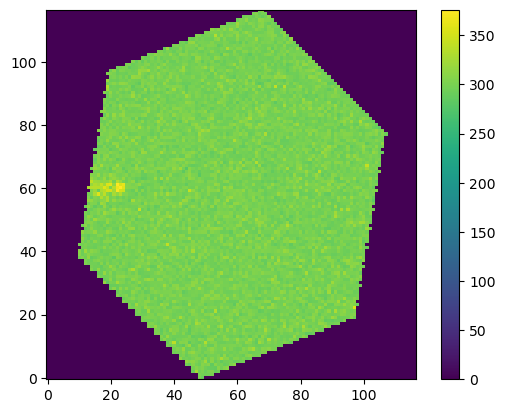

In [19]:
im = waveform["features"][6][:, :, 13]

plt.imshow(im, cmap='viridis', origin='lower')
plt.colorbar()
plt.show()

# Balanced patches 

In [2]:
reader = DLRawTriggerReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],#, "/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "HexagonalPatchMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "balanced_patches",
                              cpe_threshold = 10,
                              sequence_length = 20,
                              add_dummy_channel = False,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1,2,3,4],
                              quality_cuts = False)

cherenkov length = 709553, repeated_indices = 709553, batch length 709553
nsb_cosmic length = 709553, repeated_indices = 709553, batch length 709553
patches_indexes length = 709553, repeated_indices = 709553, batch length 709553


In [4]:
reader.example_identifiers

<Table length=709553>
index  file_index table_index ...   log_true_energy   true_shower_primary_class
                              ...         TeV                                  
int64    int64       int64    ...       float64                 int64          
------ ---------- ----------- ... ------------------- -------------------------
     0          0           0 ... -1.9925999642324606                         1
     1          0           0 ... -1.9925999642324606                         1
     2          0           0 ... -1.9925999642324606                         1
     3          0           0 ... -1.9925999642324606                         1
     4          0           0 ... -1.9925999642324606                         1
     5          0           0 ... -1.9925999642324606                         1
     6          0           0 ... -1.9925999642324606                         1
     7          0           0 ... -1.9925999642324606                         1
     8          0           0 ... -1.9925999642324606                         1
   ...        ...         ... ...                 ...                       ...
709544          0       11207 ... -0.8692292010335622                         1
709545          0       11207 ... -0.8692292010335622                         1
709546          0       11207 ... -0.8692292010335622                         1
709547          0       11207 ... -0.8692292010335622                         1
709548          0       11207 ... -0.8692292010335622                         1
709549          0       11059 ... -0.8692292010335622                         1
709550          0       11059 ... -0.8692292010335622                         1
709551          0       11059 ... -0.8692292010335622                         1
709552          0       11059 ... -0.8692292010335622                         1

In [7]:
print(reader.n_bkg_events)
print(reader.n_signal_events)

356395
353158


In [5]:
selected_indices = np.where((reader.example_identifiers["cherenkov_pe"]> 1000))[0][0:20]
selected_indices

array([1207, 1208, 6435, 6439, 6456, 6458, 6465, 6480, 6486, 6529, 6541,
       6543, 6602, 6994, 7004, 7008, 7018, 7020, 7023, 7033])

In [8]:
waveform = reader.generate_mono_batch(batch_indices=[1207, 1208, 6435, 6439, 6456, 6458, 6465, 6480, 6486, 6529, 6541,
       6543, 6602, 6994, 7004, 7008, 7018, 7020, 7023, 7033])
waveform

<Table length=20>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
 1207          0          16 ...  0.48964242629100024                         1
 1208          0          16 ...  0.48964242629100024                         1
 6435          0         104 ... -0.09426708272977585                         1
 6439          0         105 ... -0.09426708272977585                         1
 6456          0         105 ... -0.09426708272977585                         1
 6458          0         105 ... -0.09426708272977585                         1
 6465          0         105 ... -0.09426708272977585                         1
 6480          0         104 ... -0.09426708272977585                         1
 6486          0         104 ... -0.09426708272977585                         1
 6529          0         104 ... -0.09426708272977585                         1
 6541          0          99 ... -0.09426708272977585                         1
 6543          0          99 ... -0.09426708272977585                         1
 6602          0         105 ... -0.09426708272977585                         1
 6994          0         114 ...   0.8304918117865314                         1
 7004          0         114 ...   0.8304918117865314                         1
 7008          0         114 ...   0.8304918117865314                         1
 7018          0         112 ...   0.8304918117865314                         1
 7020          0         112 ...   0.8304918117865314                         1
 7023          0         112 ...   0.8304918117865314                         1
 7033          0         112 ...   0.8304918117865314                         1

343


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


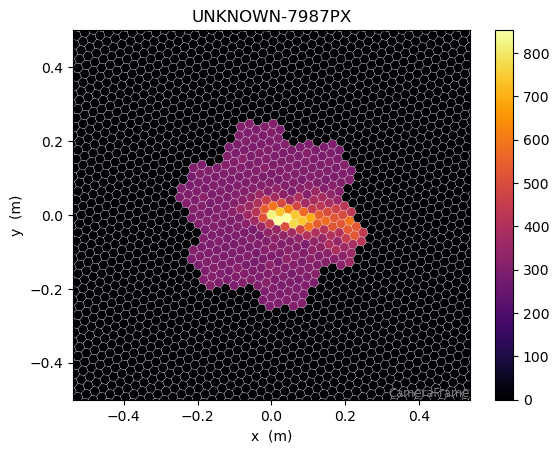

In [15]:
patch0=reader.image_mappers['UNKNOWN-7987PX'].trigger_patches[0]
indices=np.where(reader.image_mappers['UNKNOWN-7987PX'].trigger_patches[0]==1)[0]
print(len(indices))

im = np.zeros((7987,20))
wf = waveform["features"][4]

# wf[reader.image_mappers['UNKNOWN-7987PX'].neighbor_array[25]]=500


im[indices,:]=wf
display7987 = CameraDisplay(geom)
display7987.image = im[:,11]
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
display7987.add_colorbar()
plt.show()

# All patches

In [20]:
%%time
reader = DLRawTriggerReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],#, "/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "HexagonalPatchMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "all_patches",
                              cpe_threshold = 10,
                              sequence_length = 20,
                              add_dummy_channel = False,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1,2,3,4],
                              quality_cuts = False)

cherenkov length = 4574951, repeated_indices = 4574951, batch length 4574951
nsb_cosmic length = 4574951, repeated_indices = 4574951, batch length 4574951
patches_indexes length = 4574951, repeated_indices = 4574951, batch length 4574951
CPU times: user 32.2 s, sys: 1.87 s, total: 34.1 s
Wall time: 34 s


In [17]:
reader.example_identifiers

<Table length=4574951>
 index  file_index table_index ...   log_true_energy   true_shower_primary_class
                               ...         TeV                                  
 int64    int64       int64    ...       float64                 int64          
------- ---------- ----------- ... ------------------- -------------------------
      0          0           0 ... -1.9925999642324606                         1
      1          0           0 ... -1.9925999642324606                         1
      2          0           0 ... -1.9925999642324606                         1
      3          0           0 ... -1.9925999642324606                         1
      4          0           0 ... -1.9925999642324606                         1
      5          0           0 ... -1.9925999642324606                         1
      6          0           0 ... -1.9925999642324606                         1
      7          0           0 ... -1.9925999642324606                         1
      8          0           0 ... -1.9925999642324606                         1
    ...        ...         ... ...                 ...                       ...
4574942          0       11059 ... -0.8692292010335622                         1
4574943          0       11059 ... -0.8692292010335622                         1
4574944          0       11059 ... -0.8692292010335622                         1
4574945          0       11059 ... -0.8692292010335622                         1
4574946          0       11059 ... -0.8692292010335622                         1
4574947          0       11059 ... -0.8692292010335622                         1
4574948          0       11059 ... -0.8692292010335622                         1
4574949          0       11059 ... -0.8692292010335622                         1
4574950          0       11059 ... -0.8692292010335622                         1

In [19]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8,9])

<Table length=10>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ... -1.9925999642324606                         1
    1          0           0 ... -1.9925999642324606                         1
    2          0           0 ... -1.9925999642324606                         1
    3          0           0 ... -1.9925999642324606                         1
    4          0           0 ... -1.9925999642324606                         1
    5          0           0 ... -1.9925999642324606                         1
    6          0           0 ... -1.9925999642324606                         1
    7          0           0 ... -1.9925999642324606                         1
    8          0           0 ... -1.9925999642324606                         1
    9          0           0 ... -1.9925999642324606                         1

# ImageReader hexagonal output LST

To be able to use CTLearn with LST i added a computed cam_neighbor_array if geometry.name == "LSTCam"

In [2]:
reader = DLImageReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrainingDataMC/gamma_theta_30.390_az_266.360_runs1-60.dl1.h5"],#, "/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "HexagonalPatchMapper",
                              mode = "mono",
                              channels = ["cleaned_image", "cleaned_relative_peak_time"])

Computed neighbor array is [[   0    1    2 ...    4    5    6]
 [   1    0    2 ...    7    8   18]
 [   2    0    1 ...    8    9   10]
 ...
 [1852 1832 1833 ...   -1   -1   -1]
 [1853 1838 1839 ...   -1   -1   -1]
 [1854 1839 1840 ...   -1   -1   -1]]


Loaded neighbor array is [[   0    1    2 ...    4    5    6]
 [   1    0    2 ...    7    8   18]
 [   2    0    1 ...    8    9   10]
 ...
 [1852 1832 1833 ...   -1   -1   -1]
 [1853 1838 1839 ...   -1   -1   -1]
 [1854 1839 1840 ...   -1   -1   -1]]


In [3]:
reader.example_identifiers

<Table length=104002>
index  file_index table_index ...   log_true_energy    true_shower_primary_class
                              ...         TeV                                   
int64    int64       int64    ...       float64                  int64          
------ ---------- ----------- ... -------------------- -------------------------
     0          0           0 ...  -1.5340518326170025                         1
     1          0           1 ...  -0.3198882748744741                         1
     2          0           2 ...  -0.3198882748744741                         1
     3          0           3 ...  -0.3198882748744741                         1
     4          0           4 ...  -0.5127842106232046                         1
     5          0           5 ...  -0.5127842106232046                         1
     6          0           8 ...  -0.6561509961593962                         1
     7          0           9 ...  -1.1513416011618456                         1
     8          0          10 ...  -1.1513416011618456                         1
   ...        ...         ... ...                  ...                       ...
103993          0      169239 ...  -0.6928266489015015                         1
103994          0      169242 ...  -1.4003352797641118                         1
103995          0      169244 ...  -1.3732872527206452                         1
103996          0      169247 ...   -1.191488348230612                         1
103997          0      169250 ... -0.47901606745828057                         1
103998          0      169251 ...  -1.5236356889966933                         1
103999          0      169252 ...  -1.5236356889966933                         1
104000          0      169256 ...  -0.6309062933049528                         1
104001          0      169258 ... -0.06423446757831013                         1

In [7]:
im = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8,9])
im

<Table length=10>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ... -1.5340518326170025                         1
    1          0           1 ... -0.3198882748744741                         1
    2          0           2 ... -0.3198882748744741                         1
    3          0           3 ... -0.3198882748744741                         1
    4          0           4 ... -0.5127842106232046                         1
    5          0           5 ... -0.5127842106232046                         1
    6          0           8 ... -0.6561509961593962                         1
    7          0           9 ... -1.1513416011618456                         1
    8          0          10 ... -1.1513416011618456                         1
    9          0          13 ... -1.0474952332583967                         1

In [5]:
sourceLST = EventSource("/lustre/ific.uv.es/ml/ucm147/datasets/TrainingDataMC/gamma_theta_30.390_az_266.360_runs1-60.dl1.h5")
geomLST = sourceLST.subarray.tel[1].camera.geometry

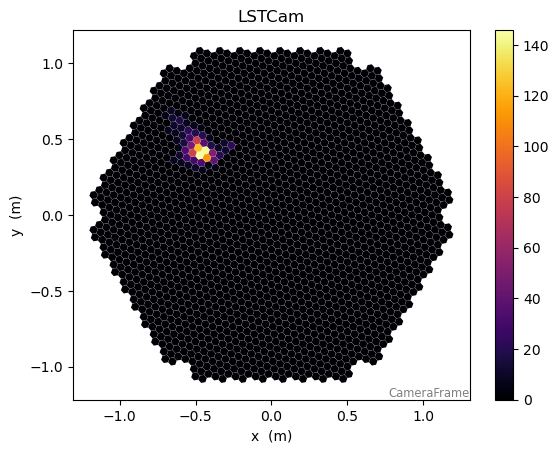

In [9]:
displayLST = CameraDisplay(geomLST)
displayLST.image = im["features"][3][:,0]
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
displayLST.add_colorbar()
plt.show()

# Image Reader hexagonal SiPM

In [12]:
reader = DLImageReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],#, "/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "HexagonalPatchMapper",
                              mode = "mono",
                              channels = ["cleaned_image", "cleaned_relative_peak_time"])

In [13]:
reader.example_identifiers

<Table length=3687>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           3 ... -0.42745453697254265                         1
    1          0           5 ...   -1.800087774779224                         1
    2          0           7 ...  -0.8830110313976508                         1
    3          0           6 ...  -0.8830110313976508                         1
    4          0           8 ...  -0.8830110313976508                         1
    5          0           7 ...  -0.8830110313976508                         1
    6          0          10 ...   -1.481803772036002                         1
    7          0          11 ...  -1.0579509455393845                         1
    8          0          13 ...  -1.0579509455393845                         1
  ...        ...         ... ...                  ...                       ...
 3678          0       11078 ... -0.16078929556705693                         1
 3679          0       11186 ... -0.16078929556705693                         1
 3680          0       11039 ... -0.16078929556705693                         1
 3681          0       11188 ...   -1.548853747923811                         1
 3682          0       11030 ... -0.26948268923429874                         1
 3683          0       11046 ... -0.26948268923429874                         1
 3684          0       11093 ...  -1.0322380973735295                         1
 3685          0       11200 ...  -1.0322380973735295                         1
 3686          0       11100 ...  -1.3769667552339369                         1

In [14]:
im = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8,9])
im

<Table length=10>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           3 ... -0.42745453697254265                         1
    1          0           5 ...   -1.800087774779224                         1
    2          0           7 ...  -0.8830110313976508                         1
    3          0           6 ...  -0.8830110313976508                         1
    4          0           8 ...  -0.8830110313976508                         1
    5          0           7 ...  -0.8830110313976508                         1
    6          0          10 ...   -1.481803772036002                         1
    7          0          11 ...  -1.0579509455393845                         1
    8          0          13 ...  -1.0579509455393845                         1
    9          0          10 ...  -1.0579509455393845                         1

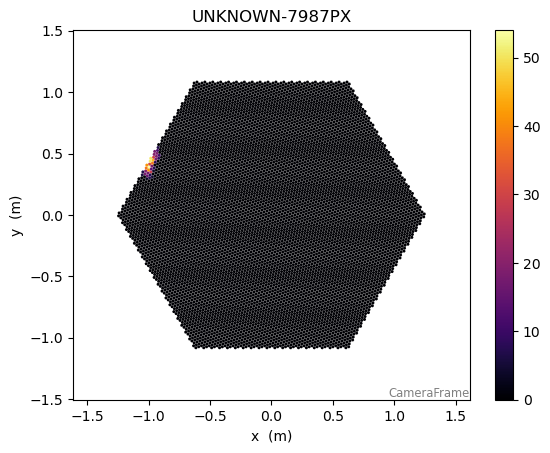

In [16]:
display7987 = CameraDisplay(geom)
display7987.image = im["features"][0][:,0]
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
display7987.add_colorbar()
plt.show()

# Image reader mapping

In [32]:
reader = DLImageReader(input_url_signal=["/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],#, "/lustre/ific.uv.es/ml/ucm147/datasets/TrigerlessData/corsika_run1.r0.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              channels = ["image", "relative_peak_time"])

In [33]:
im = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8,9])
im

<Table length=10>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           3 ... -0.42745453697254265                         1
    1          0           5 ...   -1.800087774779224                         1
    2          0           7 ...  -0.8830110313976508                         1
    3          0           6 ...  -0.8830110313976508                         1
    4          0           8 ...  -0.8830110313976508                         1
    5          0           7 ...  -0.8830110313976508                         1
    6          0          10 ...   -1.481803772036002                         1
    7          0          11 ...  -1.0579509455393845                         1
    8          0          13 ...  -1.0579509455393845                         1
    9          0          10 ...  -1.0579509455393845                         1

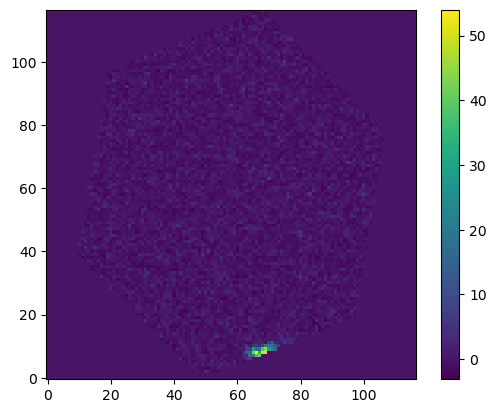

In [34]:
im = im["features"][0][:, :, 0]

plt.imshow(im, cmap='viridis', origin='lower')
plt.colorbar()
plt.show()